In [2]:
import pandas as pd

data = {
    'A': [1, 2, None, 4],
    'B': [None, 2, 3, None],
    'C': [1, None, None, 4]
}

In [4]:
df = pd.DataFrame(data)

print(df)

     A    B    C
0  1.0  NaN  1.0
1  2.0  2.0  NaN
2  NaN  3.0  NaN
3  4.0  NaN  4.0


In [5]:
print(df.isnull().sum())

A    1
B    2
C    2
dtype: int64


<Axes: >

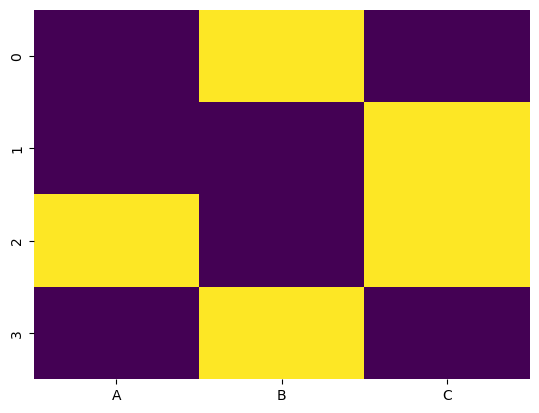

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [8]:
# remove rows with missing values

df_dropped_rows = df.dropna()
print(df_dropped_rows)

Empty DataFrame
Columns: [A, B, C]
Index: []


In [9]:
# remove column with missing values

df_dropped_cols = df.dropna(axis=1)
print(df_dropped_cols)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]


In [11]:
# mean/median/mode imputation

df_imputed_mean = df.fillna(df.mean())
print(df_imputed_mean)

df_imputed_median = df.fillna(df.median())
print(df_imputed_median)

df_imputed_mode = df.apply(lambda x: x.fillna(x.mode()[0]))
print(df_imputed_mode)

          A    B    C
0  1.000000  2.5  1.0
1  2.000000  2.0  2.5
2  2.333333  3.0  2.5
3  4.000000  2.5  4.0
     A    B    C
0  1.0  2.5  1.0
1  2.0  2.0  2.5
2  2.0  3.0  2.5
3  4.0  2.5  4.0
     A    B    C
0  1.0  2.0  1.0
1  2.0  2.0  1.0
2  1.0  3.0  1.0
3  4.0  2.0  4.0


In [12]:
# forward fill

df_ffill = df.fillna(method="ffill")
print(df_ffill)

     A    B    C
0  1.0  NaN  1.0
1  2.0  2.0  1.0
2  2.0  3.0  1.0
3  4.0  3.0  4.0


In [13]:
# backward fill

df_bfill = df.fillna(method="bfill")
print(df_bfill)

     A    B    C
0  1.0  2.0  1.0
1  2.0  2.0  4.0
2  4.0  3.0  4.0
3  4.0  NaN  4.0


In [14]:
# using interpolation

df_interpolated = df.interpolate()

print(df_interpolated)

     A    B    C
0  1.0  NaN  1.0
1  2.0  2.0  2.0
2  3.0  3.0  3.0
3  4.0  3.0  4.0


In [15]:
from fancyimpute import KNN

df_knn_imputed = pd.DataFrame(KNN(k=3).fit_transform(df), columns=df.columns)

print(df_knn_imputed)

Imputing row 1/4 with 1 missing, elapsed time: 0.000
[KNN] Warning: 1/12 still missing after imputation, replacing with 0
     A    B    C
0  1.0  2.0  1.0
1  2.0  2.0  1.6
2  2.0  3.0  0.0
3  4.0  2.0  4.0


In [16]:
from statsmodels.imputation.mice import MICEData

mice = MICEData(df)

df_mice_imputed = mice.data

print(df_mice_imputed)

     A    B    C
0  1.0  2.0  1.0
1  2.0  2.0  1.0
2  2.0  3.0  1.0
3  4.0  2.0  4.0
